In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import display
import seaborn as sns

In [51]:
df=pd.read_csv("../data/interim/horses2010.csv", delimiter=";")

<AxesSubplot:xlabel='age', ylabel='moneyWon'>

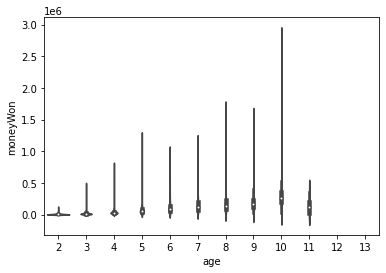

In [54]:
sns.violinplot(data=df, x="age", y="moneyWon")

In [17]:

df=df[['horse_genyId','raceId','musique','results_position','partantNum','moneyWon']]
df.tail()

,horse_genyId,raceId,musique,results_position,partantNum,moneyWon
30169,2194195,geny:331667,Inédit,4.0,10,NaN
30170,2194196,geny:331667,Inédit,6.0,11,NaN
30171,2194197,geny:331667,Inédit,NaN,12,NaN
30172,2190920,geny:331667,3p,8.0,13,NaN
30173,2185709,geny:331667,6p,9.0,14,NaN


In [18]:
#Un résultat qui n'est pas donné correspond à une disqualification du cheval
df['results_position'] = df['results_position'].replace(np.nan, 'D')

In [19]:
print(df['musique'].isna().sum())
print(df['moneyWon'].isna().sum())

0
13910


Gérer lorsque la premiere musique est nulle.

## Preprocessing de musique et de moneyWon

In [20]:
import re
musique = "(12)3p5s6t"
def clean_music_to_list(musique):
    '''Nettoie la musique (retire les lettres et supprime les nombres entre parenthèses)
    '''
    musique = re.sub("[^0-9]", " ", musique)
    musique = re.sub(r'\([^)]*\)', "", musique)
    musique = musique.split()
    return musique
df["cleaned_music"] = df["musique"].apply(clean_music_to_list)

On va chercher un cheval avec plusieurs courses, et où le money won n'est pas toujours présent.

In [46]:
sizes = df[~df["moneyWon"].isna()].groupby(["horse_genyId"]).size()
print(sizes.sort_values().tail(n=20), df.groupby(["horse_genyId"]).size().sort_values().tail(n=20))

horse_genyId
2035442     8
2000578     8
77325       8
2013475     8
2012105     8
2011488     8
88760       9
2016120     9
2098161     9
2084197     9
79259       9
2082917     9
2004211     9
2134585    10
69322      10
2023553    10
2099089    10
2125988    11
101933     11
2093767    11
dtype: int64 horse_genyId
2016120     9
2081357     9
2091510     9
2174815     9
2084197     9
2004211     9
2082917     9
2098161     9
88760       9
79259       9
2128588     9
69322      10
100174     10
2023553    10
2099089    10
2134585    10
101933     11
2125988    11
2093767    11
2032968    13
dtype: int64


In [48]:
df[df["horse_genyId"]==88760]

,horse_genyId,raceId,musique,results_position,partantNum,moneyWon,cleaned_music
3496,88760,geny:314939,Dm7m1m3m,8.0,10,120930.0,"[7, 1, 3]"
5402,88760,geny:316158,8aDm7m1m,4.0,3,120930.0,"[8, 7, 1]"
7353,88760,geny:317365,4m8aDm7m,D,1,122850.0,"[4, 8, 7]"
8551,88760,geny:318862,0m4m8aDm,7.0,12,122850.0,"[0, 4, 8]"
14499,88760,geny:321967,7m0m4m8a,4.0,12,123100.0,"[7, 0, 4, 8]"
17695,88760,geny:323373,4m7m0m4m,D,7,124420.0,"[4, 7, 0, 4]"
20331,88760,geny:325586,0m4m7m0m,D,13,124420.0,"[0, 4, 7, 0]"
22905,88760,geny:327429,Da0m4m7m,5.0,4,124420.0,"[0, 4, 7]"
29637,88760,geny:331365,3m5mDa0m,D,3,127710.0,"[3, 5, 0]"


In [13]:
df["moneyWon"] = df.groupby("horse_genyId")["moneyWon"].apply(lambda group : group.interpolate(method="linear"))
df.head()

,horse_genyId,raceId,musique,results_position,partantNum,moneyWon,cleaned_music
0,2170663,geny:312873,Inédit,5.0,1,NaN,[]
1,2170664,geny:312873,Inédit,2.0,2,NaN,[]
2,2170665,geny:312873,Inédit,4.0,3,NaN,[]
3,2170666,geny:312873,Inédit,7.0,4,NaN,[]
4,2170667,geny:312873,Inédit,6.0,5,NaN,[]
...,...,...,...,...,...,...,...
30169,2194195,geny:331667,Inédit,4.0,10,NaN,[]
30170,2194196,geny:331667,Inédit,6.0,11,NaN,[]
30171,2194197,geny:331667,Inédit,D,12,NaN,[]
30172,2190920,geny:331667,3p,8.0,13,NaN,[3]


In [53]:
df[df["horse_genyId"]==df.iloc[10000,0]]

,horse_genyId,raceId,musique,results_position,partantNum,moneyWon,cleaned_music
1771,2090916,geny:313928,0p8p0p0p,9.0,15,NaN,"[0, 8, 0, 0]"
6826,2090916,geny:317155,9p0p8p0p,NaN,11,NaN,"[9, 0, 8, 0]"
10000,2090916,geny:319801,0p9p0p8p,NaN,16,NaN,"[0, 9, 0, 8]"
16282,2090916,geny:322597,0p0p9p0p,NaN,11,NaN,"[0, 0, 9, 0]"


In [11]:
import seaborn as sn
sn.catplot(data=df, x="age", y=""

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: moneyWon, dtype: float64

In [54]:
df.groupby("horse_genyId")